**Data Loading and Basic Info**

In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
# check which columns contains null values
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64


We have comments column with because of optional field and it is irrelevant to our analysis.

**Data Pre-processing**

In [11]:
# let's look at age and gender columns
print("Gender: \n")
print(df['Gender'].unique())
print("**"*40)
print("Age: \n")
print(df['Age'].unique())

Gender: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
********************************************************************************
Age: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21    

How can age be negative and below the age limit required to work?

In [14]:
# replace all different values of gender to Male, Female and Other
df['Gender'].replace(['M', 'm', 'Male ','male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make', 'something kinda male?'], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      992
Female    247
Other      20
Name: Gender, dtype: int64

In [19]:
# keep age between 1 and 100
df = df[(df.Age > 0) & (df.Age <= 100)]
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [21]:
# drop columns
new_df = df.drop(columns=['comments', 'Timestamp'])

In [22]:
new_df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Data Visualisation**

1. How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?

In [27]:
#countries participated in the survey
print(new_df.Country.value_counts())

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Finland                     3
Austria                     3
Mexico                      3
Russia                      3
Colombia                    2
Denmark                     2
Portugal                    2
Greece                      2
Croatia                     2
China                       1
Georgia                     1
Nigeria                     1
Moldova                     1
Czech Repu

From the above values, major participants are from Unites States, Germany and Canada.

/Users/tejasd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


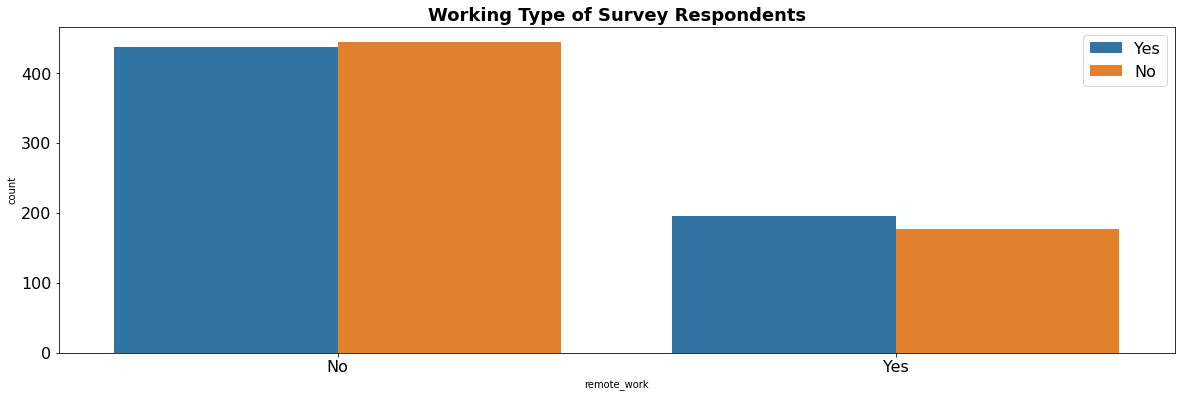

In [38]:
#
plt.figure(figsize = (20,6))
sns.countplot(new_df['remote_work'], hue = df['treatment'])
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

The number of people who work remotely or not, they are similar in seeking treatment or not.

/Users/tejasd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

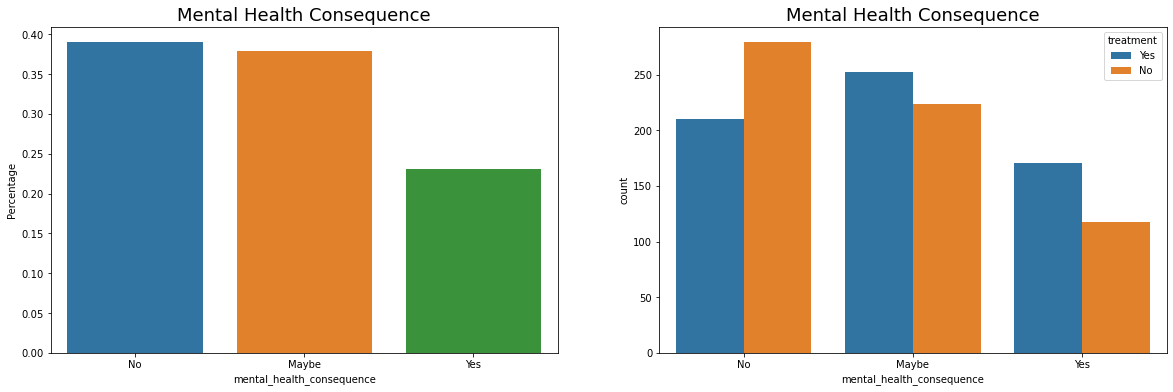

In [62]:
# Discussing mental health will employer
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
mhc = new_df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = mhc)

plt.title('Mental Health Consequence', fontsize=18)

plt.subplot(1,2,2)
sns.countplot(new_df['mental_health_consequence'], hue = new_df['treatment'])
plt.title('Mental Health Consequence', fontsize=18)


1. There are same number of people answered "No" and "Maybe" for for discussing mental health with an employer will have negative consequnces.
2. Out of around 40% of people who said no to neagtive impact, 40% people have actually sais Yes for treatment. 

/Users/tejasd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

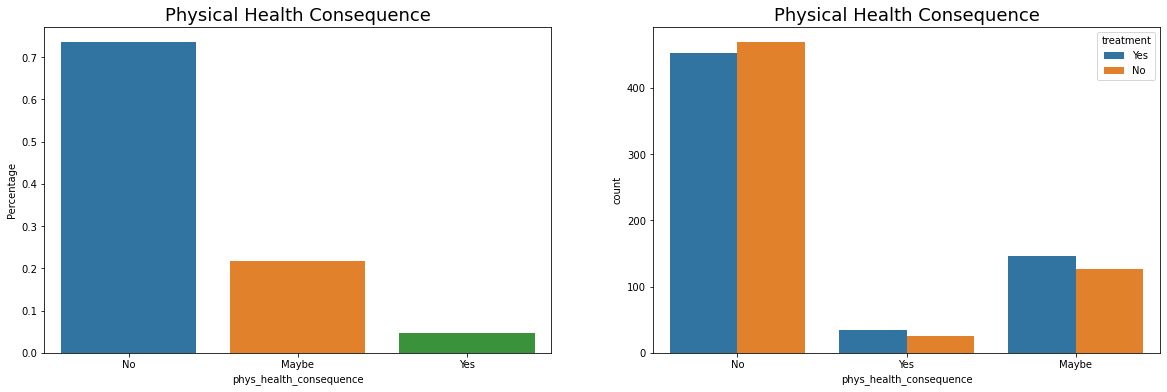

In [61]:
# Discussing physical health will employer
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
mhc = new_df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = mhc)

plt.title('Physical Health Consequence', fontsize=18)

plt.subplot(1,2,2)
sns.countplot(new_df['phys_health_consequence'], hue = new_df['treatment'])
plt.title('Physical Health Consequence', fontsize=18)

Interestingly, more 70% people believe that discussing physical health with their employer will have no negative impact. However, we cannot say anything about whether they seek treatment for mental illness based on their physical condition.
Only 5% of the people answered yes to negative consequences of discussing mental health.

/Users/tejasd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

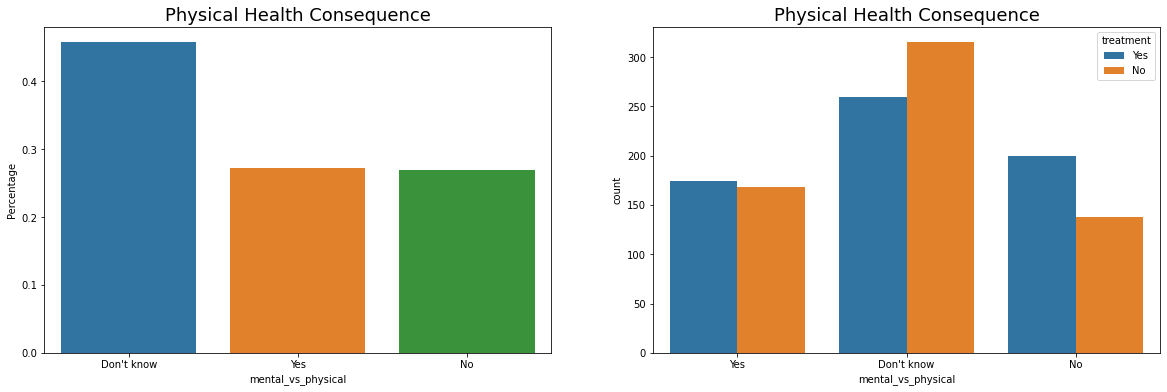

In [60]:
# Check whether an employer takes mental health seriously as physical health
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
mhc = new_df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = mhc)

plt.title('Physical Health Consequence', fontsize=18)

plt.subplot(1,2,2)
sns.countplot(new_df['mental_vs_physical'], hue = new_df['treatment'])
plt.title('Physical Health Consequence', fontsize=18)

1. Almost 50% of people answered "Don't know", and, almost similar number of people answered "Yes" and "No"
2. More than 50% people seek mental illness treatment out of who responded Yes and No to this question. For "Don't know", the proportion is totally different.

/Users/tejasd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country vs Seek Treatment')

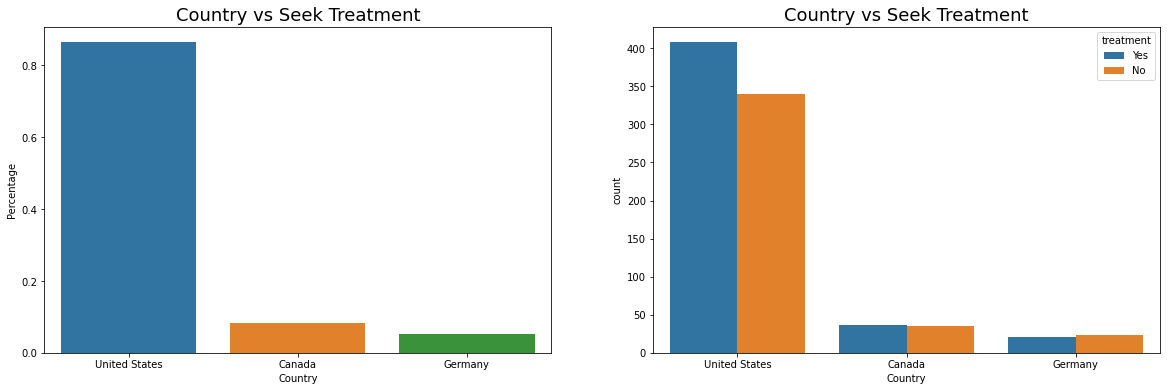

In [59]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
top_countries = new_df[(df['Country'] == 'United States') | (df['Country'] == 'Germany') | (df['Country'] == 'Canada')]['Country']

countries =  top_countries.value_counts(normalize = True).rename_axis('Country').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Country', y = 'Percentage', data = countries)
plt.title('Country vs Seek Treatment', fontsize=18)

plt.subplot(1,2,2)
sns.countplot(top_countries, hue = new_df['treatment'])
plt.title('Country vs Seek Treatment', fontsize=18)

1. More than 80% of the people who took part in the survey are from Unites States. The percentage for Canada and Germany is less than 10%.
2. The number of people who seek mental illness treatment or not are similar for both the cases. However, for US, more than 50% of total need a mental help.